In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap
from matplotlib import rc
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
def generate_taxonomy_pivot_prop(tax_df, rank, bcs, num):
    """From tax_df, generate a pivot table listing sum of prop for each rank counts, sorted by sample name"""
    pivot_table = tax_df.pivot_table(values='prop', 
                                            index=rank, 
                                            columns='sample', 
                                            aggfunc='sum', 
                                            fill_value=0)
    pivot_table.columns.name = None
    pivot_table = pivot_table.sort_values(bcs, axis=0, ascending=False).head(n=num)
    return pivot_table


#count pivot table of dataframe with taxonomic columns: 
#rows - rank names, columns - barcode, sorted by desired class
def generate_taxonomy_pivot_count(tax_df, rank, bcs, num):
    """From tax_df, generate a pivot table listing num rank counts, sorted by sample names"""
    pivot_table = tax_df.pivot_table(values='read_id_wimp', 
                                            index=rank, 
                                            columns='sample', 
                                            aggfunc='count', 
                                            fill_value=0)
    pivot_table.columns.name = None
    pivot_table = pivot_table.sort_values(bcs, axis=0, ascending=False).head(n=num)
    return pivot_table

In [4]:
# Here is just our organization of files, basically just need to define the path of final_df for each sample.
PNbasedir = '/home/yiheng/data/20180809_FAJ01633'
PIbasedir = '/home/yiheng/data/20181118_FAH84398'
PN1_df = pd.read_csv(os.path.join(PNbasedir, 'analysis', 'final_df.barcode01.csv'), sep='\t')
PN2_df = pd.read_csv(os.path.join(PNbasedir, 'analysis', 'final_df.barcode02.csv'), sep='\t')
PN3_df = pd.read_csv(os.path.join(PNbasedir, 'analysis', 'final_df.barcode03.csv'), sep='\t')
PI1_df = pd.read_csv(os.path.join('/home/yiheng/data/Pneumocystis_first_run', 'analysis', 'final_df.barcode01.csv'), sep='\t')
PI2_df = pd.read_csv(os.path.join(PIbasedir, 'analysis', 'final_df.barcode07.csv'), sep='\t')
PI3_df = pd.read_csv(os.path.join(PIbasedir, 'analysis', 'final_df.barcode08.csv'), sep='\t')

/home/yiheng/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/yiheng/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/yiheng/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# add the name for each sample for plotting
PN1_df['sample'] = 'C_1'
PN2_df['sample'] = 'C_2'
PN3_df['sample'] = 'C_3'
PI1_df['sample'] = 'Pj_1'
PI2_df['sample'] = 'Pj_2'
PI3_df['sample'] = 'Pj_3'

In [6]:
# here I listed all fungal Phylums to group all fungal reads as fungi is a subkingdom, I did not add it into the taxa dataframe.
fungal_phylums = ['Blastocladiomycota', 'Chytridiomycota', 'Glomeromycota', 'Microsporidia', 
                  'Neocallimastigomycota', 'Ascomycota', 'Basidiomycota', 'Mucoromycota']

In [7]:
# subset each final_df for plotting figure 1
subset_PN1 = PN1_df.drop(columns=['Unnamed: 0', 'barcode_arrangement_blast', 'bitscore_blast',
                    'class_blast', 'length_blast',
                    'mean_qscore_template_blast', 'nident_blast', 'order_blast',
                    'passes_filtering_blast', 'pident_blast',
                    'read_id_blast', 'sequence_length_template_blast', 'species_blast',
                    'sseqid_blast', 'staxids_blast', 'coverage_blast',
                    'mean_qscore_wimp','exit_status_wimp', 
                    'taxID_wimp', 'score_wimp', 
                    'class_wimp', 'order_wimp', 'species_wimp'])
subset_PN2 = PN2_df.drop(columns=['Unnamed: 0', 'barcode_arrangement_blast', 'bitscore_blast',
                    'class_blast', 'length_blast',
                    'mean_qscore_template_blast', 'nident_blast', 'order_blast',
                    'passes_filtering_blast', 'pident_blast',
                    'read_id_blast', 'sequence_length_template_blast', 'species_blast',
                    'sseqid_blast', 'staxids_blast', 'coverage_blast',
                    'mean_qscore_wimp','exit_status_wimp', 
                    'taxID_wimp', 'score_wimp', 
                    'class_wimp', 'order_wimp', 'species_wimp'])
subset_PN3 = PN3_df.drop(columns=['Unnamed: 0', 'barcode_arrangement_blast', 'bitscore_blast',
                    'class_blast', 'length_blast',
                    'mean_qscore_template_blast', 'nident_blast', 'order_blast',
                    'passes_filtering_blast', 'pident_blast',
                    'read_id_blast', 'sequence_length_template_blast', 'species_blast',
                    'sseqid_blast', 'staxids_blast', 'coverage_blast',
                    'mean_qscore_wimp','exit_status_wimp', 
                    'taxID_wimp', 'score_wimp', 
                    'class_wimp', 'order_wimp', 'species_wimp'])

In [8]:
subset_PI1 = PI1_df.drop(columns=['Unnamed: 0', 'barcode', 'barcode_blast', 'bitscore_blast',
                    'class_blast', 'length_blast',
                    'mean_qscore_template_blast', 'nident_blast', 'order_blast',
                    'passes_filtering_blast', 'pident_blast',
                    'read_id_blast', 'sequence_length_template_blast', 'species_blast',
                    'sseqid_blast', 'staxids_blast', 'coverage_blast',
                    'mean_qscore_wimp','exit_status_wimp', 
                    'taxID_wimp', 'score_wimp', 
                    'class_wimp', 'order_wimp', 'species_wimp', 'send_blast', 'sstart_blast'])
subset_PI2 = PI2_df.drop(columns=['Unnamed: 0', 'barcode_arrangement_blast', 'bitscore_blast',
                    'class_blast', 'length_blast',
                    'mean_qscore_template_blast', 'nident_blast', 'order_blast',
                    'passes_filtering_blast', 'pident_blast',
                    'read_id_blast', 'sequence_length_template_blast', 'species_blast',
                    'sseqid_blast', 'staxids_blast', 'coverage_blast',
                    'mean_qscore_wimp','exit_status_wimp', 
                    'taxID_wimp', 'score_wimp', 
                    'class_wimp', 'order_wimp',  'species_wimp', 'send_blast', 'sstart_blast'])
subset_PI3 = PI3_df.drop(columns=['Unnamed: 0', 'barcode_arrangement_blast', 'bitscore_blast',
                    'class_blast', 'length_blast',
                    'mean_qscore_template_blast', 'nident_blast', 'order_blast',
                    'passes_filtering_blast', 'pident_blast',
                    'read_id_blast', 'sequence_length_template_blast', 'species_blast',
                    'sseqid_blast', 'staxids_blast', 'coverage_blast',
                    'mean_qscore_wimp','exit_status_wimp', 
                    'taxID_wimp', 'score_wimp', 
                    'class_wimp', 'order_wimp', 'species_wimp', 'send_blast', 'sstart_blast'])

In [9]:
P_all = pd.concat([subset_PN1, subset_PN2, subset_PN3,
                        subset_PI1, subset_PI2, subset_PI3], ignore_index=True)

In [10]:
P_all.to_csv('/home/yiheng/analysis/clinical_WGS/Pneumocystis/final_df.all.csv', sep='\t')

In [11]:
# this is to calculating the actual proportion of bacterial sequences in each sample.
subset_PI3[(subset_PI3.superkingdom_wimp == 'Bacteria')
           & (subset_PI3.barcode_wimp == 'barcode08')].seqlen_wimp.sum()/subset_PI3[(subset_PI3.barcode_wimp == 'barcode08')].seqlen_wimp.sum()

0.03398952917512419

In [12]:
subset_PI2[(subset_PI2.superkingdom_wimp == 'Bacteria')
           & (subset_PI2.barcode_wimp == 'barcode07')].seqlen_wimp.sum()/subset_PI2[(subset_PI2.barcode_wimp == 'barcode07')].seqlen_wimp.sum()

0.26289252540245983

In [13]:
subset_PI1[(subset_PI1.superkingdom_wimp == 'Bacteria')].seqlen_wimp.sum()/subset_PI1.seqlen_wimp.sum()

0.35559637202363586

In [14]:
subset_PN3[(subset_PN3.superkingdom_wimp == 'Bacteria')
           & (subset_PN3.barcode_wimp == 'BC03')].seqlen_wimp.sum()/subset_PN3[(subset_PN3.barcode_wimp == 'BC03')].seqlen_wimp.sum()

0.003762660020799794

In [15]:
subset_PN2[(subset_PN2.superkingdom_wimp == 'Bacteria')
           & (subset_PN2.barcode_wimp == 'BC02')].seqlen_wimp.sum()/subset_PN2[(subset_PN2.barcode_wimp == 'BC02')].seqlen_wimp.sum()

0.0012361527566752308

In [16]:
subset_PN1[(subset_PN1.superkingdom_wimp == 'Bacteria')
           & (subset_PN1.barcode_wimp == 'BC01')].seqlen_wimp.sum()/subset_PN1[(subset_PN1.barcode_wimp == 'BC01')].seqlen_wimp.sum()

0.10091624916656167

In [17]:
# separate the reads for each group, used for generating values for all the tables.
subset_PN1_blast_bacteria = subset_PN1[subset_PN1.superkingdom_blast == 'Bacteria']
subset_PN1_blast_bacteria = subset_PN1_blast_bacteria.drop(columns=['genus_wimp', 'phylum_blast', 'barcode_wimp', 'phylum_wimp'])
subset_PN2_blast_bacteria = subset_PN2[subset_PN2.superkingdom_blast == 'Bacteria']
subset_PN2_blast_bacteria = subset_PN2_blast_bacteria.drop(columns=['genus_wimp', 'phylum_blast', 'barcode_wimp', 'phylum_wimp'])
subset_PN3_blast_bacteria = subset_PN3[subset_PN3.superkingdom_blast == 'Bacteria']
subset_PN3_blast_bacteria = subset_PN3_blast_bacteria.drop(columns=['genus_wimp', 'phylum_blast', 'barcode_wimp', 'phylum_wimp'])
subset_PI1_blast_bacteria = subset_PI1[subset_PI1.superkingdom_blast == 'Bacteria']
subset_PI1_blast_bacteria = subset_PI1_blast_bacteria.drop(columns=['genus_wimp', 'phylum_blast', 'barcode_wimp', 'phylum_wimp'])
subset_PI2_blast_bacteria = subset_PI2[subset_PI2.superkingdom_blast == 'Bacteria']
subset_PI2_blast_bacteria = subset_PI2_blast_bacteria.drop(columns=['genus_wimp', 'phylum_blast', 'barcode_wimp', 'phylum_wimp'])
subset_PI3_blast_bacteria = subset_PI3[subset_PI3.superkingdom_blast == 'Bacteria']
subset_PI3_blast_bacteria = subset_PI3_blast_bacteria.drop(columns=['genus_wimp', 'phylum_blast', 'barcode_wimp', 'phylum_wimp'])

In [18]:
subset_PN1_wimp_bacteria = subset_PN1[(subset_PN1.superkingdom_wimp == 'Bacteria') & (subset_PN1.barcode_wimp == 'BC01')]
subset_PN1_wimp_bacteria = subset_PN1_wimp_bacteria.drop(columns=['genus_blast', 'phylum_blast', 'barcode_wimp', 'phylum_wimp'])
subset_PN2_wimp_bacteria = subset_PN2[(subset_PN2.superkingdom_wimp == 'Bacteria') & (subset_PN2.barcode_wimp == 'BC02')]
subset_PN2_wimp_bacteria = subset_PN2_wimp_bacteria.drop(columns=['genus_blast', 'phylum_blast', 'barcode_wimp', 'phylum_wimp'])
subset_PN3_wimp_bacteria = subset_PN3[(subset_PN3.superkingdom_wimp == 'Bacteria') & (subset_PN3.barcode_wimp == 'BC03')]
subset_PN3_wimp_bacteria = subset_PN3_wimp_bacteria.drop(columns=['genus_blast', 'phylum_blast', 'barcode_wimp', 'phylum_wimp'])
subset_PI1_wimp_bacteria = subset_PI1[(subset_PI1.superkingdom_wimp == 'Bacteria')]
subset_PI1_wimp_bacteria = subset_PI1_wimp_bacteria.drop(columns=['genus_blast', 'phylum_blast', 'barcode_wimp', 'phylum_wimp'])
subset_PI2_wimp_bacteria = subset_PI2[(subset_PI2.superkingdom_wimp == 'Bacteria') & (subset_PI2.barcode_wimp == 'barcode07')]
subset_PI2_wimp_bacteria = subset_PI2_wimp_bacteria.drop(columns=['genus_blast', 'phylum_blast', 'barcode_wimp', 'phylum_wimp'])
subset_PI3_wimp_bacteria = subset_PI3[(subset_PI3.superkingdom_wimp == 'Bacteria') & (subset_PI3.barcode_wimp == 'barcode08')]
subset_PI3_wimp_bacteria = subset_PI3_wimp_bacteria.drop(columns=['genus_blast', 'phylum_blast', 'barcode_wimp', 'phylum_wimp'])

In [19]:
subset_PN1_wimp_fungi = subset_PN1[subset_PN1.phylum_wimp.isin(fungal_phylums) & (subset_PN1.barcode_wimp == 'BC01')]
subset_PN1_wimp_fungi = subset_PN1_wimp_fungi.drop(columns=['genus_blast', 'phylum_blast', 'barcode_wimp', 'phylum_wimp'])
subset_PN2_wimp_fungi = subset_PN2[subset_PN2.phylum_wimp.isin(fungal_phylums) & (subset_PN2.barcode_wimp == 'BC02')]
subset_PN2_wimp_fungi = subset_PN2_wimp_fungi.drop(columns=['genus_blast', 'phylum_blast', 'barcode_wimp', 'phylum_wimp'])
subset_PN3_wimp_fungi = subset_PN3[subset_PN3.phylum_wimp.isin(fungal_phylums) & (subset_PN3.barcode_wimp == 'BC03')]
subset_PN3_wimp_fungi = subset_PN3_wimp_fungi.drop(columns=['genus_blast', 'phylum_blast', 'barcode_wimp', 'phylum_wimp'])
subset_PI1_wimp_fungi = subset_PI1[subset_PI1.phylum_wimp.isin(fungal_phylums)]
subset_PI1_wimp_fungi = subset_PI1_wimp_fungi.drop(columns=['genus_blast', 'phylum_blast', 'barcode_wimp', 'phylum_wimp'])
subset_PI2_wimp_fungi = subset_PI2[subset_PI2.phylum_wimp.isin(fungal_phylums) & (subset_PI2.barcode_wimp == 'barcode07')]
subset_PI2_wimp_fungi = subset_PI2_wimp_fungi.drop(columns=['genus_blast', 'phylum_blast', 'barcode_wimp', 'phylum_wimp'])
subset_PI3_wimp_fungi = subset_PI3[subset_PI3.phylum_wimp.isin(fungal_phylums) & (subset_PI3.barcode_wimp == 'barcode08')]
subset_PI3_wimp_fungi = subset_PI3_wimp_fungi.drop(columns=['genus_blast', 'phylum_blast', 'barcode_wimp', 'phylum_wimp'])

In [20]:
#calculate the proportion of total length for each read
subset_PN1_wimp_fungi['prop'] = subset_PN1_wimp_fungi['seqlen_wimp']/subset_PN1_wimp_fungi.seqlen_wimp.sum()*100
subset_PN2_wimp_fungi['prop'] = subset_PN2_wimp_fungi['seqlen_wimp']/subset_PN2_wimp_fungi.seqlen_wimp.sum()*100
subset_PN3_wimp_fungi['prop'] = subset_PN3_wimp_fungi['seqlen_wimp']/subset_PN3_wimp_fungi.seqlen_wimp.sum()*100
subset_PI1_wimp_fungi['prop'] = subset_PI1_wimp_fungi['seqlen_wimp']/subset_PI1_wimp_fungi.seqlen_wimp.sum()*100
subset_PI2_wimp_fungi['prop'] = subset_PI2_wimp_fungi['seqlen_wimp']/subset_PI2_wimp_fungi.seqlen_wimp.sum()*100
subset_PI3_wimp_fungi['prop'] = subset_PI3_wimp_fungi['seqlen_wimp']/subset_PI3_wimp_fungi.seqlen_wimp.sum()*100

In [21]:
# further trim the dataframe for 
subset_PN1_blast_fungi = subset_PN1[subset_PN1.phylum_blast.isin(fungal_phylums)]
subset_PN1_blast_fungi = subset_PN1_blast_fungi.drop(columns=['genus_wimp', 'phylum_blast', 'barcode_wimp', 'phylum_wimp'])
subset_PN2_blast_fungi = subset_PN2[subset_PN2.phylum_blast.isin(fungal_phylums)]
subset_PN2_blast_fungi = subset_PN2_blast_fungi.drop(columns=['genus_wimp', 'phylum_blast', 'barcode_wimp', 'phylum_wimp'])
subset_PN3_blast_fungi = subset_PN3[subset_PN3.phylum_blast.isin(fungal_phylums)]
subset_PN3_blast_fungi = subset_PN3_blast_fungi.drop(columns=['genus_wimp', 'phylum_blast', 'barcode_wimp', 'phylum_wimp'])
subset_PI1_blast_fungi = subset_PI1[subset_PI1.phylum_blast.isin(fungal_phylums)]
subset_PI1_blast_fungi = subset_PI1_blast_fungi.drop(columns=['genus_wimp', 'phylum_blast', 'barcode_wimp', 'phylum_wimp'])
subset_PI2_blast_fungi = subset_PI2[subset_PI2.phylum_blast.isin(fungal_phylums)]
subset_PI2_blast_fungi = subset_PI2_blast_fungi.drop(columns=['genus_wimp', 'phylum_blast', 'barcode_wimp', 'phylum_wimp'])
subset_PI3_blast_fungi = subset_PI3[subset_PI3.phylum_blast.isin(fungal_phylums)]
subset_PI3_blast_fungi = subset_PI3_blast_fungi.drop(columns=['genus_wimp', 'phylum_blast', 'barcode_wimp', 'phylum_wimp'])

In [22]:
subset_PN1_blast_fungi['prop'] = subset_PN1_blast_fungi['seqlen_wimp']/subset_PN1_blast_fungi.seqlen_wimp.sum()*100
subset_PN2_blast_fungi['prop'] = subset_PN2_blast_fungi['seqlen_wimp']/subset_PN2_blast_fungi.seqlen_wimp.sum()*100
subset_PN3_blast_fungi['prop'] = subset_PN3_blast_fungi['seqlen_wimp']/subset_PN3_blast_fungi.seqlen_wimp.sum()*100
subset_PI1_blast_fungi['prop'] = subset_PI1_blast_fungi['seqlen_wimp']/subset_PI1_blast_fungi.seqlen_wimp.sum()*100
subset_PI2_blast_fungi['prop'] = subset_PI2_blast_fungi['seqlen_wimp']/subset_PI2_blast_fungi.seqlen_wimp.sum()*100
subset_PI3_blast_fungi['prop'] = subset_PI3_blast_fungi['seqlen_wimp']/subset_PI3_blast_fungi.seqlen_wimp.sum()*100

In [23]:
P_all_wimp = pd.concat([subset_PN1_wimp_fungi, subset_PN2_wimp_fungi, subset_PN3_wimp_fungi,
                        subset_PI1_wimp_fungi, subset_PI2_wimp_fungi, subset_PI3_wimp_fungi], ignore_index=True)

In [24]:
P_all_bacteria_wimp = pd.concat([subset_PN1_wimp_bacteria, subset_PN2_wimp_bacteria, subset_PN3_wimp_bacteria,
                        subset_PI1_wimp_bacteria, subset_PI2_wimp_bacteria, subset_PI3_wimp_bacteria], ignore_index=True)

In [25]:
P_all_blast = pd.concat([subset_PN1_blast_fungi, subset_PN2_blast_fungi, subset_PN3_blast_fungi,
                        subset_PI1_blast_fungi, subset_PI2_blast_fungi, subset_PI3_blast_fungi], ignore_index=True)

In [26]:
P_all_bacteria_blast = pd.concat([subset_PN1_blast_bacteria, subset_PN2_blast_bacteria, subset_PN3_blast_bacteria,
                        subset_PI1_blast_bacteria, subset_PI2_blast_bacteria, subset_PI3_blast_bacteria], ignore_index=True)

In [27]:
blast_pivot_df_num = generate_taxonomy_pivot_count(P_all_blast, 'genus_blast', 'C_1', 500)
wimp_pivot_df_num = generate_taxonomy_pivot_count(P_all_wimp, 'genus_wimp', 'C_1', 500)

In [28]:
# this are the proportion pivot figures for plotting figure 1 and 2
blast_pivot_df = generate_taxonomy_pivot_prop(P_all_blast, 'genus_blast', 'C_1', 500)
wimp_pivot_df = generate_taxonomy_pivot_prop(P_all_wimp, 'genus_wimp', 'C_1', 500)

In [29]:
T_blast_pivot_df = blast_pivot_df.T
T_blast_pivot_df

genus_blast,Malassezia,Melampsora,Botrytis,Bipolaris,Sclerotinia,Ogataea,Batrachochytrium,Penicillium,Unclassified,Fibroporia,...,Fonsecaea,Neurospora,Colletotrichum,Fellomyces,Barnettozyma,Phialophora,Pneumocystis,Podosphaera,Exophiala,Ramularia
C_1,12.659516,5.071507,4.603960,4.460946,4.441694,4.075908,4.015402,3.668867,3.239824,2.49725,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
C_2,4.119183,0.000000,3.380658,0.000000,14.636786,0.000000,0.000000,4.100083,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
C_3,17.569388,2.574927,2.056948,0.000000,5.380401,0.000000,0.000000,1.155723,1.730591,0.00000,...,0.000000,3.691727,0.000000,0.865295,1.81742,0.000000,1.071888,1.251534,0.829366,0.000000
Pj_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,3.997954,0.000000,1.288711,0.000000,0.00000,0.641404,24.540589,0.000000,0.000000,1.097863
Pj_2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,21.379865,0.000000,0.000000,0.000000
Pj_3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,45.003893,0.000000,0.000000,0.000000


In [30]:
# profiling and tidy up data to be percentage
# this is a tricky part
# Here we would like to take the top 19 genera for plotting individually and all the other genera go to 'others'. 
# Because there is a 'Unclassified fungi' in wimp plotting so we decided to preserve the 'Unclassified fungi' in blast result although it is not ranked in the top 19
# Here is the hard code to modify the dataframe
T_blast_pivot_df['Others'] = T_blast_pivot_df[(T_blast_pivot_df.loc[:,:] < 4.43) & (T_blast_pivot_df.columns != 'Unclassified')].sum(axis=1)
T_blast_pivot_df = T_blast_pivot_df[(T_blast_pivot_df.loc[:,:] < 4.43) == 0]
T_blast_pivot_df['Unclassified'] = [3.239824,0.000000,1.730591,0.000000,0.000000,0.000000]
#T_blast_pivot_df = T_blast_pivot_df[T_blast_pivot_df.loc[:,'Unclassified'] == [3.239824,0.000000,1.730591,0.000000,0.000000,0.000000]]
blast_pivot_df_sum = T_blast_pivot_df.T
blast_pivot_df_sum.fillna(value=0, inplace=True)
blast_pivot_df_sum = blast_pivot_df_sum[blast_pivot_df_sum.sum(axis=1) != 0]

In [31]:
T_wimp_pivot_df = wimp_pivot_df.T
T_wimp_pivot_df['Others'] = T_wimp_pivot_df[T_wimp_pivot_df.loc[:,:] < 1.96].sum(axis=1)
T_wimp_pivot_df = T_wimp_pivot_df[(T_wimp_pivot_df.loc[:,:] < 1.96) == 0]
wimp_pivot_df_sum = T_wimp_pivot_df.T
wimp_pivot_df_sum.fillna(value=0, inplace=True)
wimp_pivot_df_sum = wimp_pivot_df_sum[wimp_pivot_df_sum.sum(axis=1) != 0]

In [32]:
blast_pivot_df_sum_reorder = blast_pivot_df_sum.loc[:,['C_1', 'C_2', 'C_3', 'Pj_1', 'Pj_2', 'Pj_3',]]
wimp_pivot_df_sum_reorder = wimp_pivot_df_sum.loc[:,['C_1', 'C_2', 'C_3', 'Pj_1', 'Pj_2', 'Pj_3',]]

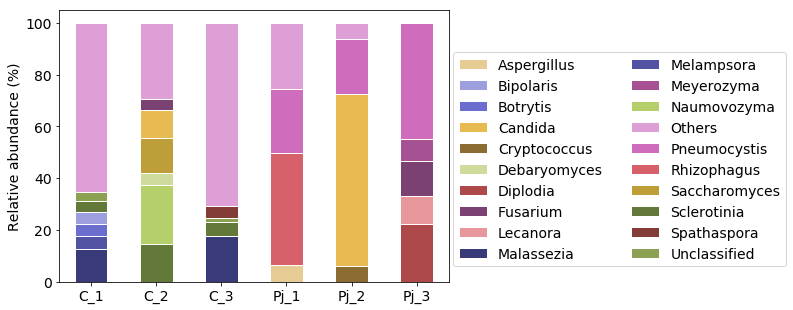

In [33]:
fig, ax = plt.subplots(1,figsize=(10,10))
blast_pivot_df_sum_reorder.T.plot(kind='bar', stacked=True,
              colormap=ListedColormap(sns.color_palette('tab20b', 20)), fontsize=14, rot=0,
              figsize=(7,5),edgecolor='white', ax = ax)

handles, labels = ax.get_legend_handles_labels()
#here we go for sorting handles and labels
legend_dict = dict(zip(labels, handles))
lables_list_sorted = [x for x in legend_dict.keys()]
lables_list_sorted.sort()
legend_handle_list_sorted = [legend_dict[x] for x in lables_list_sorted]

ax.legend(legend_handle_list_sorted, lables_list_sorted, loc='center right',bbox_to_anchor=(1.88, 0.45), ncol=2, fontsize=14)#, fontproperties=font)
ax.set_ylabel("Relative abundance (%)", fontsize=14)

plt.savefig('/home/yiheng/analysis/clinical_WGS/Pneumocystis/figure1_blast.svg', bbox_inches='tight', dpi=600)

plt.show()

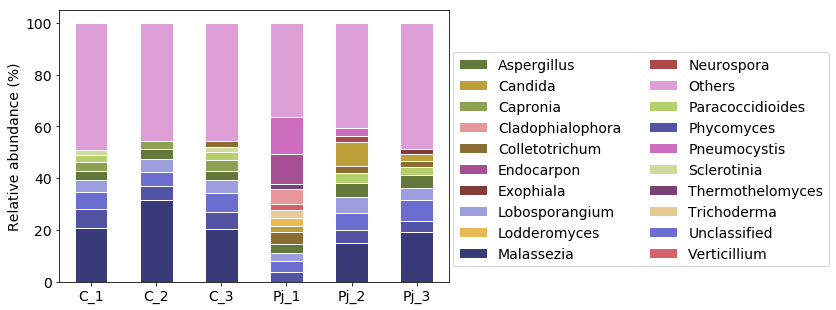

In [34]:
fig, ax = plt.subplots(1,figsize=(10,10))
wimp_pivot_df_sum_reorder.T.plot(kind='bar', stacked=True,
              colormap=ListedColormap(sns.color_palette('tab20b', 20)), fontsize=14, rot=0,
              figsize=(7,5),edgecolor='white', ax = ax)


handles, labels = ax.get_legend_handles_labels()
#here we go for sorting handles and labels
legend_dict = dict(zip(labels, handles))
lables_list_sorted = [x for x in legend_dict.keys()]
lables_list_sorted.sort()
legend_handle_list_sorted = [legend_dict[x] for x in lables_list_sorted]

ax.legend(legend_handle_list_sorted, lables_list_sorted, loc='center right',bbox_to_anchor=(1.99, 0.45), ncol=2, fontsize=14)#, fontproperties=font)
ax.set_ylabel("Relative abundance (%)", fontsize=14)

plt.savefig('/home/yiheng/analysis/clinical_WGS/Pneumocystis/figure1_wimp.svg', bbox_inches='tight', dpi=600)
plt.show()